# Predict Traffic Accident Severity


#### Priyanka Dave
#### October 2020

<img src="img.jpg" alt="Predict Traffic Accident Severity" title="Predict Traffic Accident Severity" />

## Table of content
1. [Introduction](#intro)
2. [Data](#data)
1. [Exploratory Data Analysis](#eda)
1. [Data Preparation](#dp)
1. [Modeling](#modeling)
1. [Results](#results)
1. [Discussion](#discussion)
1. [Conclusion](#conclusion)

##  1. Introduction<a id='intro'>

Road traffic injuries are currently estimated to be the eighth leading cause of death across all age groups globally, and are predicted to become the seventh leading cause of death by 2030.

In an effort to reduce the frequency of car collisions in a community, an algorithim must be developed to predict the severity of an accident given the current weather, road and visibility conditions. When conditions are bad, this model will alert drivers to remind them to be more careful.

These insights, could allow law enforcement bodies to allocate their resources more effectively in advance of potential accidents, preventing when and where a severe accidents can occur as well as saving both, time and money. In addition, this knowledge of a severe accident situation can be warned to drivers so that they would drive more carefully or even change their route if it is possible or to hospital which could have set everything ready for a severe intervention in advance.

Governments should be highly interested in accurate predictions of the severity of an accident, in order to reduce the time of arrival and thus save a significant amount of people each year. Others interested could be private companies investing in technologies aiming to improve road safeness.

## 2. Data<a id='data'>

- The original data for this project comes from the following [Click Here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv).
- Initial dataset having 194673 samples and 38 features.
- After removing features having identification numbers, features having more than 40% null values and features which are irrelevant to the application, I left with below list of features:


    1. **SEVERITYCODE** - Target variable. 1: Property Damege, 2: Injury
    1. **ADDRTYPE** - Collision address type. Alley, Block, Intersection
    1. **COLLISIONTYPE** - Collision type. Parked Car, Angles, Rear Ended, etc...
    1. **PERSONCOUNT** - Total number of people involved in the collision.
    1. **VEHCOUNT** - Total number of vehicles involved in the collision.
    1. **JUNCTIONTYPE** - Category of junction at which collision took place
    1. **UNDERINFL** - Whether or not a driver involved was under the influence of drugs or alcohol.
    1. **WEATHER** - Description of the weather conditions during the time of the collision.
    1. **ROADCOND** - Condition of the road during the collision.
    1. **LIGHTCOND** - Light conditions during the collision.
    1. **X** - X co-ordinate.
    1. **Y** - Y co-ordinate.




# 3. Exploratory Data Analysis<a id='eda'>

### 3.1 Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.metrics import accuracy_score, jaccard_similarity_score, f1_score, log_loss, precision_score, recall_score, roc_curve

from sklearn.utils import resample

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 3.2 Import Data

In [ ]:
df = pd.read_csv('Data-Collisions.csv',low_memory=False)

### 3.3 Dataset Overview

In [3]:
df.head(3)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N


In [4]:
df.shape

(194673, 38)

In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

### 3.4 Target Variable Overview

Text(0.5, 1.0, 'Category Distribution In Target Variable: SEVERITYCODE')

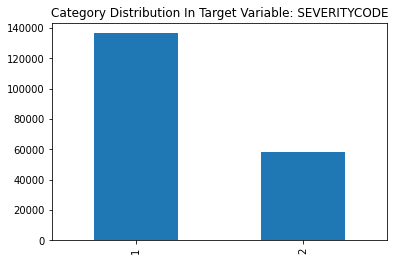

In [6]:
df['SEVERITYCODE'].value_counts().plot(kind='bar')
plt.title('Category Distribution In Target Variable: SEVERITYCODE')

**Observations: Above graph shows, there are two categories in target variable and the distribution is imbalanced.**

### 3.5 Data Cleaning

#### Identify and remove columns having more than 30% missing values

In [7]:
missing_values = df.isnull().mean() * 100
missing_values = missing_values[missing_values>30].sort_values()
cols_to_remove=missing_values.index.to_list()
df = df.drop(cols_to_remove,axis = 1)
missing_values

SDOTCOLNUM        40.959455
EXCEPTRSNCODE     56.434123
INTKEY            66.574718
INATTENTIONIND    84.689710
SPEEDING          95.205807
EXCEPTRSNDESC     97.103861
PEDROWNOTGRNT     97.602646
dtype: float64

#### 3.5.2 Remove ids, duplicate and imbalanced and irrelevant data columns

In [8]:
cols_to_remove = ['PEDCOUNT', 'PEDCYLCOUNT', 'OBJECTID','INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS','SEVERITYDESC','SEVERITYCODE.1','SEGLANEKEY', 'CROSSWALKKEY','LOCATION','INCDTTM','SDOT_COLCODE','SDOT_COLDESC','HITPARKEDCAR','ST_COLDESC','INCDATE','ST_COLCODE']
df = df.drop(cols_to_remove,axis = 1)

#### 3.5.4 Fill/Drop missing values

In [9]:
print(df.isnull().mean() * 100)
df.dropna(axis=0,inplace=True)

SEVERITYCODE     0.000000
X                2.739979
Y                2.739979
ADDRTYPE         0.989351
COLLISIONTYPE    2.519096
PERSONCOUNT      0.000000
VEHCOUNT         0.000000
JUNCTIONTYPE     3.251093
UNDERINFL        2.508822
WEATHER          2.610018
ROADCOND         2.574574
LIGHTCOND        2.655736
dtype: float64


**Observations: Here it shows very small amount data are missing. So instead of filling it with any method, let's drop these rows.**

#### 3.5.5 Down Sample Majority Class

Text(0.5, 1.0, 'Category Distribution In Target Variable After Down Sampling: SEVERITYCODE')

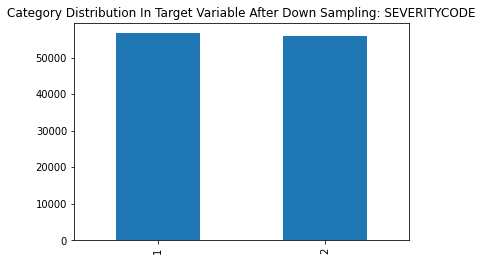

In [10]:
df_majority = df[df['SEVERITYCODE']==1]
df_minority = df[df['SEVERITYCODE']==2]

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=56625,     # to match minority class
                                 random_state=123) # reproducible results

df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled['SEVERITYCODE'].value_counts().plot(kind='bar')
plt.title('Category Distribution In Target Variable After Down Sampling: SEVERITYCODE')

#### 3.5.6 Data Visualization

#### Check data distribution with respect to the target variable before down sampling and after down sampling: Before down sampling

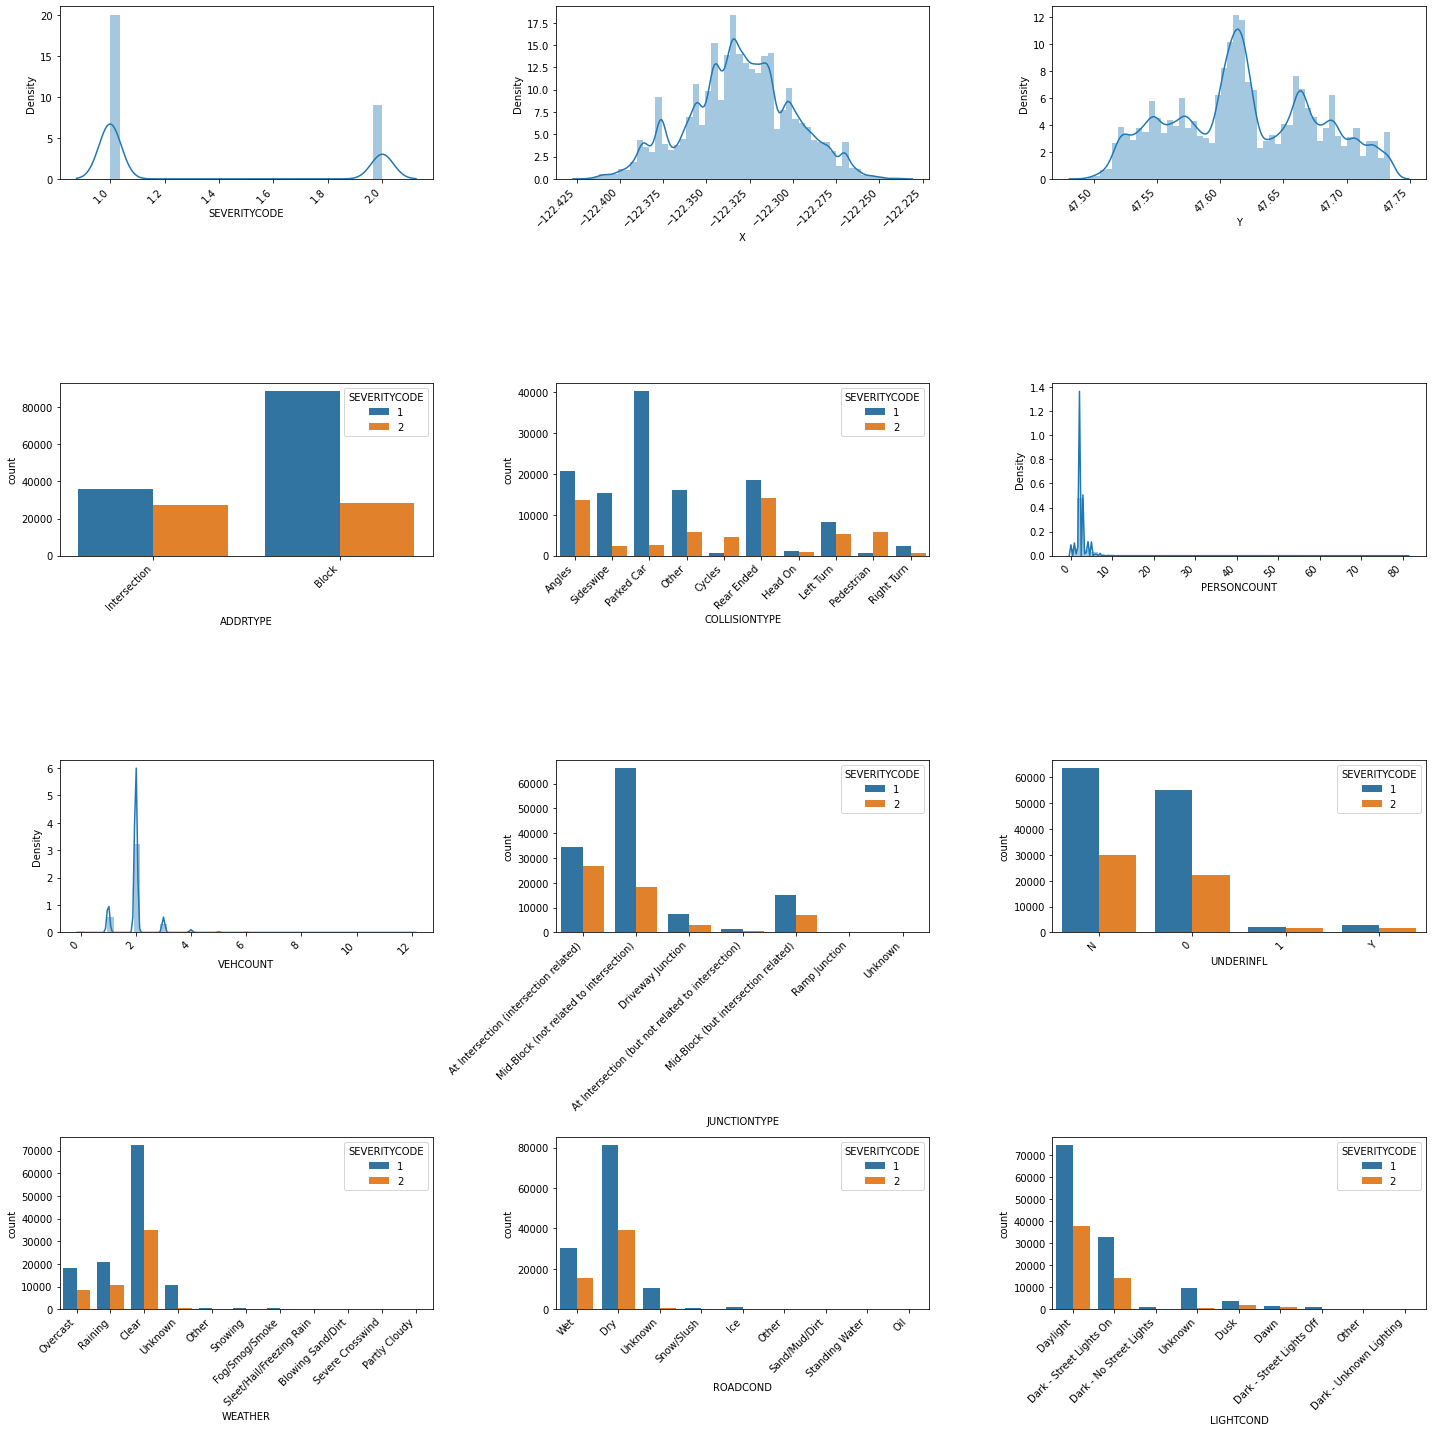

In [11]:
fig, axes =plt.subplots(4,3, figsize=(20,20))
axes = axes.flatten()
for ax, col in zip(axes, df.columns):
    ax.set_xlabel(col)
    if df[col].dtype=='O':
        sns.countplot(x=col, hue ='SEVERITYCODE', data=df, ax=ax)
    else:
        sns.distplot(df[col],ax=ax)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

fig.tight_layout()

#### Check data distribution with respect to the target variable before down sampling and after down sampling: After down sampling

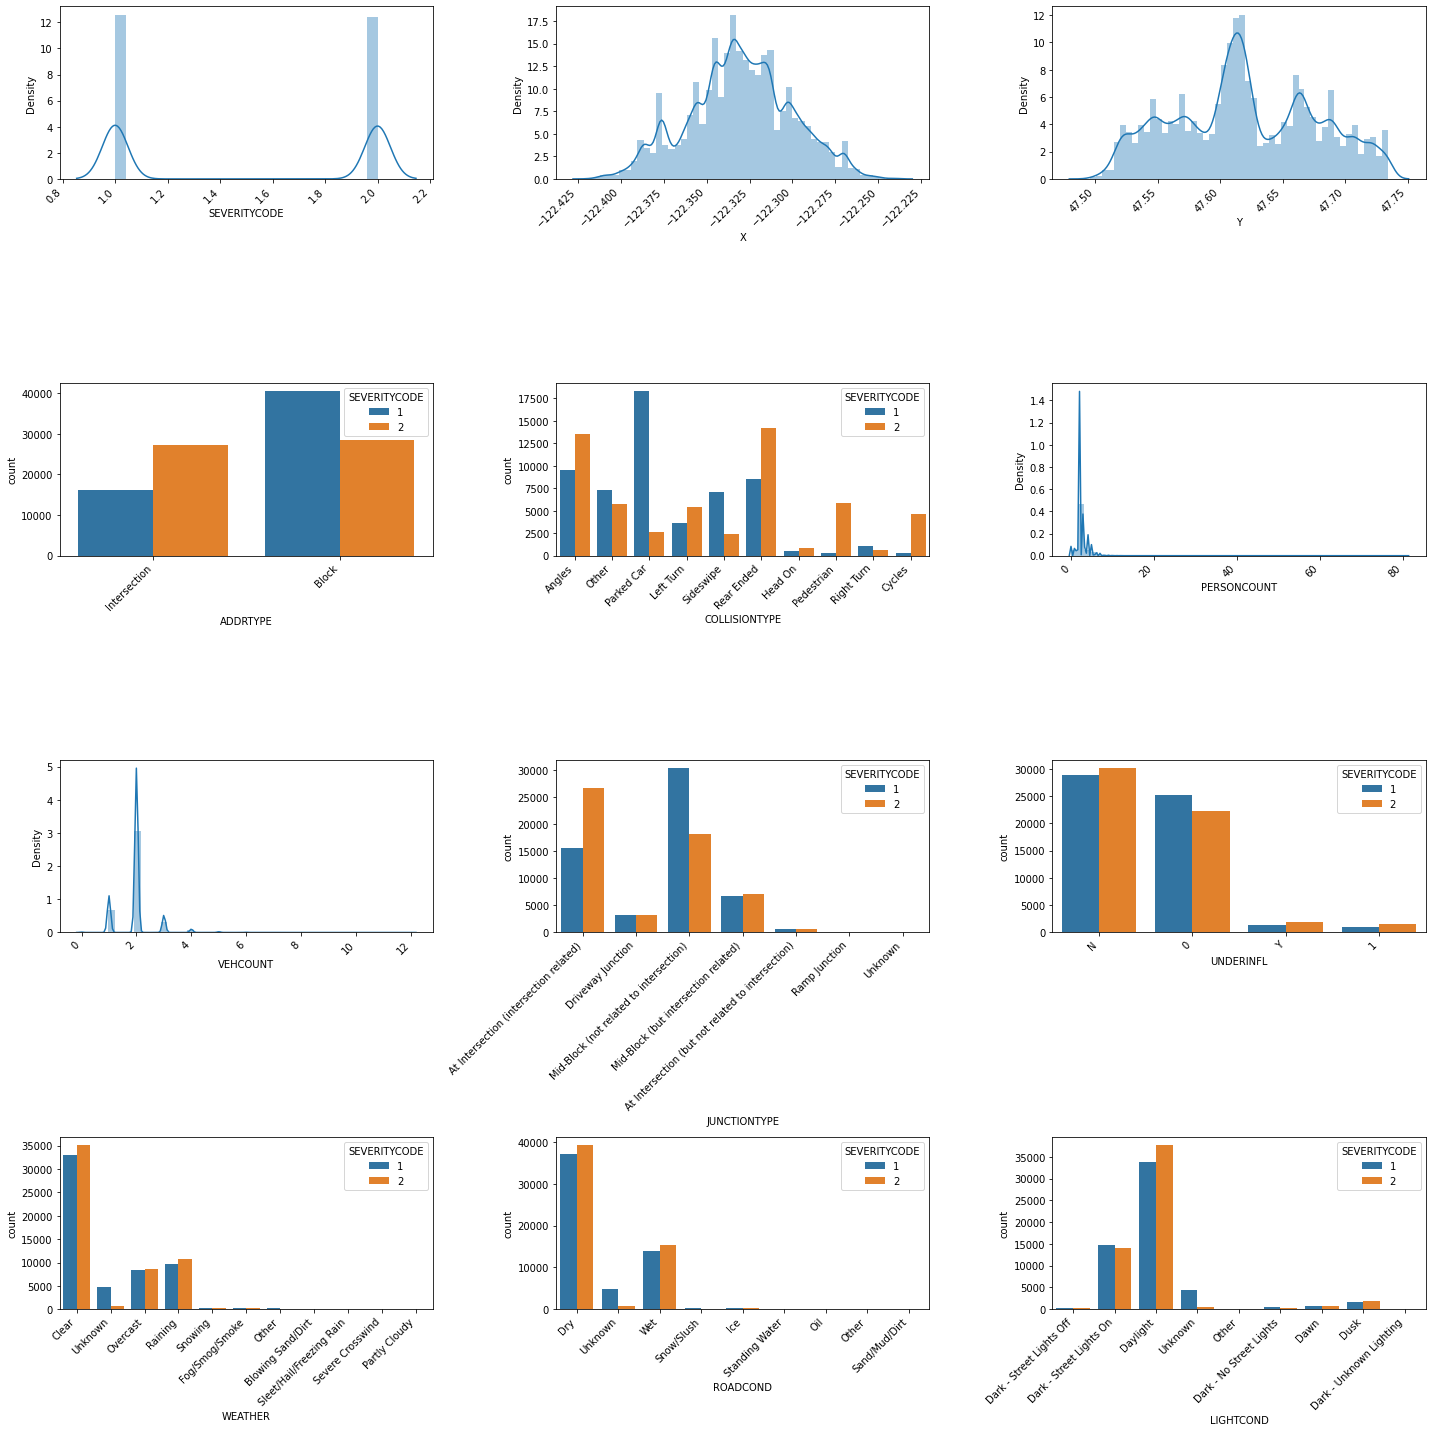

In [12]:
fig, axes =plt.subplots(4,3, figsize=(20,20))
axes = axes.flatten()
for ax, col in zip(axes, df_downsampled.columns):
    ax.set_xlabel(col)
    if df_downsampled[col].dtype=='O':
        sns.countplot(x=col, hue ='SEVERITYCODE', data=df_downsampled, ax=ax)
    else:
        sns.distplot(df_downsampled[col],ax=ax)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

fig.tight_layout()

**Observations:**
1. **Above graphs shows that, data pattern remains intact even after down sampling. That means we have not lost any important data.**
1. **Feature 'UNDERINFL' having ambiguous categories. we should merge Y with 1 and N with 0.**
1. **Feature WEATHER having ambiguous categories. We should merge Sleet/Hail/Freezing Rain with Snowing, Other with Unknown, Blowing Sand/Dirt with Severe Crosswind.**
1. **Feature ROADCOND having ambiguous categories. We should merge Other with Unknown.**
1. **Feature LIGHTCOND having ambiguous categories. We should merge Other with Unknown, Dark - Street Lights Off with Dark - No Street Lights.**
1. **It also shows that maximum collisions happened in Clear WEATHER Dry ROADCOND and Daylight LIGHTCOND.**
1. **From the graph it looks like all the MONTH and all the DAY_OF_WEEK features having similar impact on target variable. We should remove these features.**


In [13]:
df_downsampled.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'VEHCOUNT', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND'],
      dtype='object')

#### Merge Ambiguous Categories

In [14]:
df_downsampled.loc[df_downsampled['ROADCOND'] == 'Other', 'ROADCOND'] = 'Unknown'
df_downsampled.loc[df_downsampled['LIGHTCOND'] == 'Other','LIGHTCOND'] = 'Unknown'
df_downsampled.loc[df_downsampled['LIGHTCOND'] == 'Dark - Street Lights Off','LIGHTCOND'] = 'Dark - No Street Lights'
df_downsampled.loc[df_downsampled['UNDERINFL'] == 'Y','UNDERINFL'] = '1'
df_downsampled.loc[df_downsampled['UNDERINFL'] == 'N','UNDERINFL'] = '0'
df_downsampled.loc[df_downsampled['WEATHER'] == 'Sleet/Hail/Freezing Rain','WEATHER'] = 'Snowing'
df_downsampled.loc[df_downsampled['WEATHER'] == 'Other','WEATHER'] = 'Unknown'
df_downsampled.loc[df_downsampled['WEATHER'] == 'Blowing Sand/Dirt','WEATHER'] = 'Severe Crosswind'

## 4. Data Preparation<a id='dp'>

In [15]:
df_downsampled.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'VEHCOUNT', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND'],
      dtype='object')

### 4.1 Convert Categorical features to numerical values

In [16]:
df_downsampled.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
191726,1,-122.335574,47.610678,Intersection,Angles,2,2,At Intersection (intersection related),0,Clear,Dry,Dark - No Street Lights
43155,1,-122.330298,47.603233,Intersection,Angles,2,2,At Intersection (intersection related),0,Clear,Dry,Dark - Street Lights On
12677,1,-122.325890,47.640877,Block,Other,2,2,Driveway Junction,0,Clear,Dry,Daylight
97204,1,-122.327864,47.617782,Block,Other,2,2,Mid-Block (not related to intersection),0,Clear,Dry,Dark - Street Lights On
25627,1,-122.341555,47.607585,Block,Parked Car,2,2,Mid-Block (not related to intersection),0,Unknown,Unknown,Unknown


**Note: In this step we need to covert below columns:.**</font>
   1. **ADDRTYPE**
   1. **JUNCTIONTYPE**
   1. **COLLISIONTYPE**
   1. **WEATHER**
   1. **ROADCOND**
   1. **LIGHTCOND**  
        
        

In [17]:
cat_cols_to_convert = ['ADDRTYPE','JUNCTIONTYPE','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND']

In [18]:
for c in cat_cols_to_convert:
    print(c+":")
    print(df_downsampled[c].value_counts())
    print("\n----------------------\n")

ADDRTYPE:
Block           68981
Intersection    43453
Name: ADDRTYPE, dtype: int64

----------------------

JUNCTIONTYPE:
Mid-Block (not related to intersection)              48568
At Intersection (intersection related)               42164
Mid-Block (but intersection related)                 13905
Driveway Junction                                     6440
At Intersection (but not related to intersection)     1264
Ramp Junction                                           89
Unknown                                                  4
Name: JUNCTIONTYPE, dtype: int64

----------------------

COLLISIONTYPE:
Angles        23050
Rear Ended    22712
Parked Car    20902
Other         13068
Sideswipe      9478
Left Turn      9059
Pedestrian     6129
Cycles         4999
Right Turn     1658
Head On        1379
Name: COLLISIONTYPE, dtype: int64

----------------------

WEATHER:
Clear               68252
Raining             20412
Overcast            16868
Unknown              5968
Snowing             

In [19]:
converted_df = pd.get_dummies(data=df_downsampled, columns=cat_cols_to_convert)

In [20]:
converted_df.shape

(112434, 48)

In [21]:
converted_df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'PERSONCOUNT', 'VEHCOUNT', 'UNDERINFL',
       'ADDRTYPE_Block', 'ADDRTYPE_Intersection',
       'JUNCTIONTYPE_At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)',
       'JUNCTIONTYPE_Ramp Junction', 'JUNCTIONTYPE_Unknown',
       'COLLISIONTYPE_Angles', 'COLLISIONTYPE_Cycles', 'COLLISIONTYPE_Head On',
       'COLLISIONTYPE_Left Turn', 'COLLISIONTYPE_Other',
       'COLLISIONTYPE_Parked Car', 'COLLISIONTYPE_Pedestrian',
       'COLLISIONTYPE_Rear Ended', 'COLLISIONTYPE_Right Turn',
       'COLLISIONTYPE_Sideswipe', 'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke',
       'WEATHER_Overcast', 'WEATHER_Partly Cloudy', 'WEATHER_Raining',
       'WEATHER_Severe Crosswind', 'WEATHER_Snowing', 'WEATHER_Unknown',
       'ROADCOND_Dry', 'ROADCOND_

### 4.2 Drop Duplicate Rows

In [22]:
converted_df.drop_duplicates(keep='last',inplace=True)

In [23]:
converted_df.shape

(102937, 48)

### 4.3 Normalize Data

In [24]:
target = ['SEVERITYCODE']
y = converted_df[target].values
x = converted_df.drop(target,axis=1)

In [25]:
normalized_x= preprocessing.StandardScaler().fit(x).transform(x)

## 5. Modeling<a id='modeling'>

### Classification Algorthms To Use:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

### 5.1 Split dataset into training and testing set

In [26]:
x_train, x_test, y_train, y_test = train_test_split(normalized_x, y.ravel(), test_size=0.3, random_state=42)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (72055, 47) (72055,)
Test set: (30882, 47) (30882,)


### 5.2 K Nearest Neighbor(KNN)

In [27]:
knn = KNeighborsClassifier(n_neighbors = 11).fit(x_train, y_train)

### 5.3 Decision Trees

In [28]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10).fit(x_train, y_train)


### 5.4 Support Vector Machines

In [29]:
sv = svm.SVC(kernel='rbf').fit(x_train,y_train)


### 5.5 Logistic Regression

In [30]:
lr = LogisticRegression(C = 0.01, solver = 'liblinear').fit(x_train, y_train)


## 6. Evaluation

In [31]:
knn_res = knn.predict(x_test)
knn_jac = jaccard_similarity_score(y_test, knn_res)
knn_f1 = f1_score(y_test, knn_res, average='weighted')

dt_res = dt.predict(x_test)
dt_jac = jaccard_similarity_score(y_test, dt_res)
dt_f1 = f1_score(y_test, dt_res, average='weighted')

sv_res = sv.predict(x_test)
sv_jac = jaccard_similarity_score(y_test, sv_res)
sv_f1 = f1_score(y_test, sv_res, average='weighted')

lr_res = lr.predict(x_train)
lr_jac = jaccard_similarity_score(y_train, lr_res)
lr_f1 = f1_score(y_test, lr_res, average='weighted')

lr_pr = lr.predict_proba(x_test)
lr_prob = round(log_loss(y_test, lr_pr), 2)

## 7. Results<a id='results'>

In [32]:
columns = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
index = ['Jaccard', 'F1-score', 'LogLoss']

jacc = [knn_jac, dt_jac, sv_jac, lr_jac]
f1_list = [knn_f1, dt_f1, sv_f1, lr_f1]
ll_list = ['NA','NA','NA',lr_prob]

accuracy_df = pd.DataFrame([jacc, f1_list, ll_list], index = index, columns = columns)
accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.668771,0.668784,NA
Decision Tree,0.688524,0.68417,NA
SVM,0.691568,0.689671,NA
Logistic Regression,0.690958,0.685113,0.56


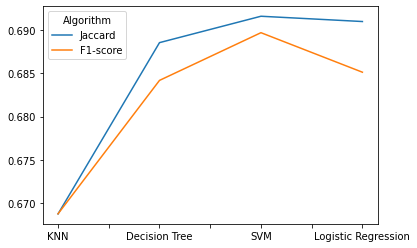

In [33]:
accuracy_df1.plot()